# Participation 5

__NAME:__ Alex Ojemann

Today we're going to explore Perceptron Learning in SKLearn. Let's import some stuff and set up the "David Quigley University Admissions" problem we've been discussing in class. Then, we'll visualize the distribution in 2d space.

(Yes, it is an absurdly small dataset. This is by design for this activity.)

In [1]:
import sklearn.linear_model
import sklearn.datasets
import sklearn.preprocessing
import matplotlib.pyplot as plt
import numpy as np

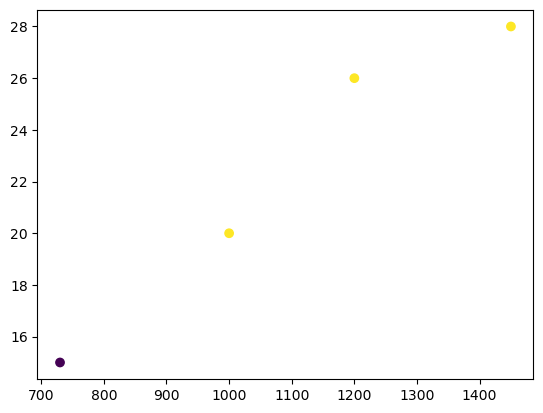

In [2]:
dqu_train_X = np.array([
    [1200,26],
    [1450,28],
    [1000,20],
    [730,15]
])
dqu_train_y = [1,1,1,-1]

plt.scatter(dqu_train_X[:,0], dqu_train_X[:,1], c=dqu_train_y)
plt.show()

Now, let's see how well a Perceptron model (in SKLearn) can learn a decision boundary. Let's fit a Perceptron for 1000 iterations and set a tolerance of "None" in order to force it to try and learn a boundary that works for all training samples.

We'll also visualize the samples and decision boundary.

Accuracy on DQU Train Set
1.0


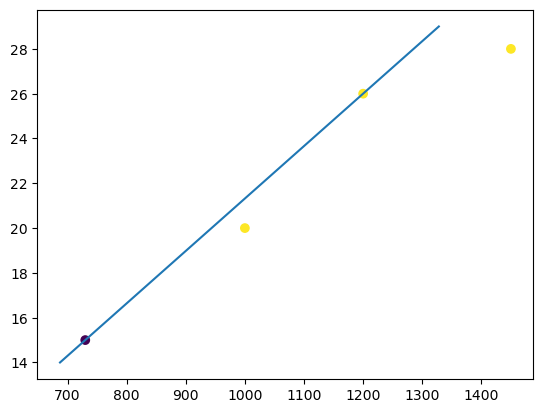

In [7]:
model = sklearn.linear_model.Perceptron(max_iter = 10000000, tol=None)
model.fit(dqu_train_X, dqu_train_y)
print("Accuracy on DQU Train Set")
print(model.score(dqu_train_X, dqu_train_y))

plt.scatter(dqu_train_X[:,0], dqu_train_X[:,1], c=dqu_train_y)

plotter_ys = np.array(range(14,30))
plotter_Xs = list()
for y in plotter_ys:
    plotter_Xs.append((-model.intercept_[0] - y*model.coef_[0][1]) / model.coef_[0][0])
    
plt.plot(plotter_Xs, plotter_ys)


plt.show()

Dang, it doesn't learn an effective boundary! We should see how long it takes.

### Q1: Increase the number of iterations by a power of 10 until you get a model that gets 100% accuracy on the training dataset.
#### A: What is the number of iterations (or the power of 10) that will create a decision boundary that works on the training dataset?
#### B: Does this decision boundary look particularly effective for our problem space? Are there examples you think would be improperly represented?

_HINT: Just add an additional 0 to the 'max_iter' argument and try again, repeat as necessary._
_HINT: The target should match the number of iterations I described it taking in lecture on Monday 2/13_

%Q1 A and B Response Here
A. 10000000 iterations
B. It's not effective for out problem space because it penalizes students for having a higher ACT score. For example, a student with a 1100 SAT and a 20 ACT would be admitted and a student with a 1100 SAT and a 26 ACT would not.

Let's see if we can learn a little more about why the perceptron does poorly on the DQU dataset (_HINT: Hopefully your answer to Q1-B build on "no, it is ineffective", otherwise come ask questions_). We'll make a dataset that tries to behave like the DQU dataset but allows us to tweak features.

_We will be adjusting the variables I used to define parameters of the model below. Try to keep the original value comments in place._
_I have removed the visualization of the decision boundary by commenting it away. You can add it back in if you like._

Accuracy on Blob Set
0.95


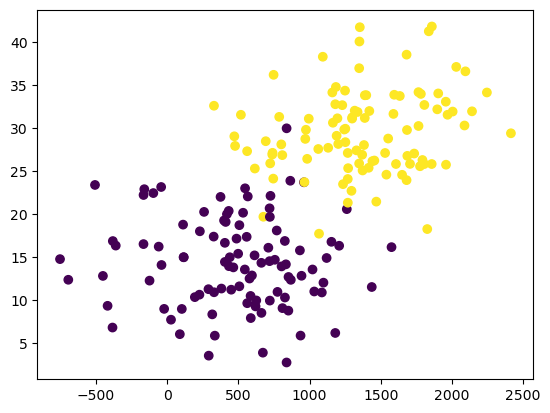

In [24]:
import sklearn.datasets

### START OF VARIABLES TO ADJUST
iterations = 1000000 # Original Value 1000

samples_no = 100 # Original Value 100
samples_yes = 100 # Original Value 100

mean_SAT_no = 500 #Original Value 500
mean_SAT_yes = 1400 # Original Value 1400

mean_ACT_no = 14 # Original Value 14
mean_ACT_yes = 30 # Original Value 30

dev_SAT = 500 #Original Value 500
dev_ACT = 5 # Original Value 5
### END OF VARIABLES TO ADJUST

blob_X, blob_y = sklearn.datasets.make_blobs(n_samples=[samples_no,samples_yes], #defines the number of samples in each blob
                                             centers= [[mean_SAT_no,mean_ACT_no],
                                                       [mean_SAT_yes,mean_ACT_yes]], # defines the center of each blob (0 and 1)
                                             cluster_std = 1, # Works in conjunction with loop below to add deviance
                                             random_state=23)


for index in range(len(blob_X[:,0])): #adjust the std. dev. of SATs to be 500 and the std.dev of ACTs to 5
    
    blob_X[index][0] = (dev_SAT*(blob_X[index][0]
                                - (mean_SAT_no + (mean_SAT_yes - mean_SAT_no)*blob_y[index]))
                        + (mean_SAT_no + (mean_SAT_yes - mean_SAT_no)*blob_y[index]))
    blob_X[index][1] = (dev_ACT*(blob_X[index][1]
                                - (mean_ACT_no + (mean_ACT_yes - mean_ACT_no)*blob_y[index]))
                        + (mean_ACT_no + (mean_ACT_yes - mean_ACT_no)*blob_y[index]))

model = sklearn.linear_model.Perceptron(max_iter = iterations, tol=None)
model.fit(blob_X, blob_y)
print("Accuracy on Blob Set")
print(model.score(blob_X, blob_y))

plt.scatter(blob_X[:,0], blob_X[:,1], c=blob_y)

plotter_Xs = np.array(range(int(min(blob_X[:,0])),int(max(blob_X[:,0]))))
plotter_ys = list()
for x in plotter_Xs:
    plotter_ys.append((-model.intercept_[0] - x*model.coef_[0][0]) / model.coef_[0][1])
    
# plt.plot(plotter_Xs, plotter_ys) #YOU CAN UNCOMMENT THIS LINE TO VISUALIZE THE DECISION BOUNDARY

plt.show()


### Q2: Explore the impact of modifying the blobs in the cell above.
#### A: Adjust the max_iterations to get a training accuracy of >= 0.95. How many iterations (or what scale of 10^x) did you need?
#### B: Try decreasing n_samples to the distribution found in the DQU dataset \[1,3\]. Does this increase the number of iterations required? How does it compare to the number of iterations from the original DQU dataset (Q1)?
_i.e. when can you get all four samples classified correctly?_
#### C: Change the scale of the SAT variable by dividing the means and standard deviation values by 10. How does this impact the number of iterations you need?

%Q2 A, B, and C Responses Here
A. Using the same method as in Q1 where the number of iterations is increased by 10 each round, it took 1000000 iterations before the accuracy was >= 0.95.
B. Yes, it now takes 10000000 iterations to get accuracy >= 0.95.
C. You now only need 10000 iterations instead of 1000000 to get accuracy >= 0.95.

### BONUS 30 Participation Points
#### Pass the X features through SKLearn's [Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). What impact does this have on the ability of the Perceptron model to learn?
_i.e. how many iterations does it take now?_

Accuracy on Blob Set
0.97


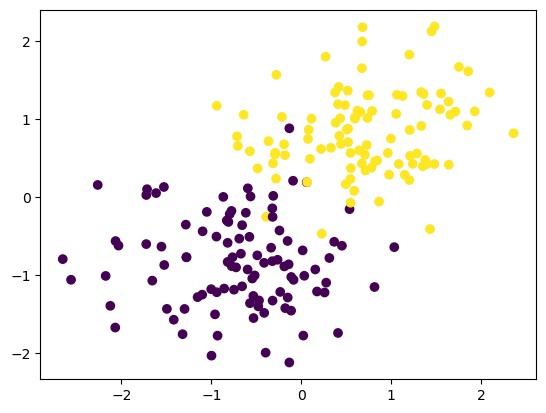

In [43]:
import sklearn.datasets

### START OF VARIABLES TO ADJUST
iterations = 10 # Original Value 1000

samples_no = 100 # Original Value 100
samples_yes = 100 # Original Value 100

mean_SAT_no = 500 #Original Value 500
mean_SAT_yes = 1400 # Original Value 1400

mean_ACT_no = 14 # Original Value 14
mean_ACT_yes = 30 # Original Value 30

dev_SAT = 500 #Original Value 500
dev_ACT = 5 # Original Value 5
### END OF VARIABLES TO ADJUST

blob_X, blob_y = sklearn.datasets.make_blobs(n_samples=[samples_no,samples_yes], #defines the number of samples in each blob
                                             centers= [[mean_SAT_no,mean_ACT_no],
                                                       [mean_SAT_yes,mean_ACT_yes]], # defines the center of each blob (0 and 1)
                                             cluster_std = 1, # Works in conjunction with loop below to add deviance
                                             random_state=23)

for index in range(len(blob_X[:,0])): #adjust the std. dev. of SATs to be 500 and the std.dev of ACTs to 5
    
    blob_X[index][0] = (dev_SAT*(blob_X[index][0]
                                - (mean_SAT_no + (mean_SAT_yes - mean_SAT_no)*blob_y[index]))
                        + (mean_SAT_no + (mean_SAT_yes - mean_SAT_no)*blob_y[index]))
    blob_X[index][1] = (dev_ACT*(blob_X[index][1]
                                - (mean_ACT_no + (mean_ACT_yes - mean_ACT_no)*blob_y[index]))
                        + (mean_ACT_no + (mean_ACT_yes - mean_ACT_no)*blob_y[index]))
    
scaler = sklearn.preprocessing.StandardScaler().fit(blob_X)
blob_X = scaler.transform(blob_X)

model = sklearn.linear_model.Perceptron(max_iter = iterations, tol=None)
model.fit(blob_X, blob_y)
print("Accuracy on Blob Set")
print(model.score(blob_X, blob_y))

plt.scatter(blob_X[:,0], blob_X[:,1], c=blob_y)

plotter_Xs = np.array(range(int(min(blob_X[:,0])),int(max(blob_X[:,0]))))
plotter_ys = list()
for x in plotter_Xs:
    plotter_ys.append((-model.intercept_[0] - x*model.coef_[0][0]) / model.coef_[0][1])
    
# plt.plot(plotter_Xs, plotter_ys) #YOU CAN UNCOMMENT THIS LINE TO VISUALIZE THE DECISION BOUNDARY

plt.show()

You now only need 10 iterations to achieve accuracy >= 0.95.